<a href="https://colab.research.google.com/github/fofofizzz/AI-4032-course/blob/main/Hw1/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Q2-PART I

#part A

#1)

خوانده میشود loadmat فرمت فایل دانلود شده به صورت متلب است که با دستور

In [1]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# نمایش فایل های موجود در پوشه مد نظر ما
data_path = '/content/drive/My Drive/data'
print(os.listdir(data_path))

['110.mat']


In [4]:
#file path: (/content/drive/My Drive/data/110.mat)

#2)

In [18]:
import scipy.io
from scipy.io import loadmat

'''
scipyخب ما در این بخش از کد ابتدا کتاب خانه
را اضافه میکنیمloadmat و از آن
چون ما به دستور loadmat
را ایمپورت کردیمscipy احتیاج داریم از این رو
'''

data = loadmat('/content/drive/My Drive/data/110.mat')   # بارگذاری فایل مد نظر ما

print(data.keys())                                       # نمایش اطلاعات کلیدی
print("\nX110RPM =" ,data["X110RPM"])                    # نمایش اطلاعات مربوط به دور
print("\nX110_DE_time:" , "\nlen=" , len(data["X110_DE_time"]) , "\ndata:\n" , data["X110_DE_time"])
#DEنمایش اطلاعات مربوط به متغیر
print("\nX110_FE_time:" , "\nlen=" , len(data["X110_FE_time"]) , "\ndata:\n" , data["X110_FE_time"])
#FEنمایش اطلاعات مربوط به متغیر

dict_keys(['__header__', '__version__', '__globals__', 'X110_DE_time', 'X110_FE_time', 'X110RPM'])

X110RPM = [[1772]]

X110_DE_time: 
len= 486224 
data:
 [[ 0.03212677]
 [ 0.07823077]
 [ 0.16146831]
 ...
 [-0.08845292]
 [-0.02899754]
 [ 0.00855323]]

X110_FE_time: 
len= 486224 
data:
 [[0.08629091]
 [0.11053455]
 [0.11012364]
 ...
 [0.40145818]
 [0.46782   ]
 [0.52534727]]


در این فایل دو آرایه متشکل از تعداد زیادی فلوت موجود است که به نام های مشخص شده ذخیره شده اند و یک متغیر به نام دور بر دقیقه نیز موجود است که آرایه ای یک بعدی است

#3)

In [6]:
signal = data[ 'X110_DE_time' ]

#PART B

#1)

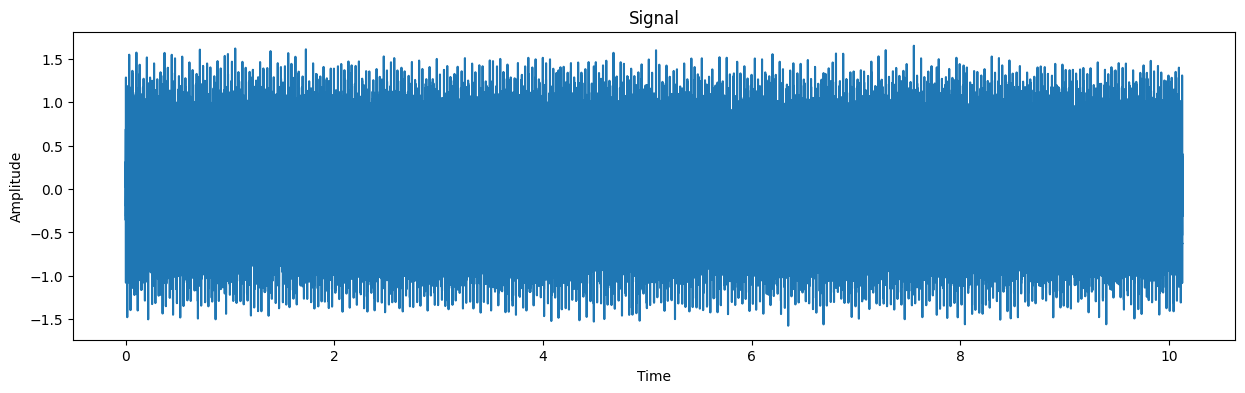

In [7]:
import matplotlib.pyplot as plt         #we use matplotlib.pyplot
fs=48000                                #declaring the frequence
time = np.arange(len(signal)) / fs      #declaring the time that it continue
plt.figure(figsize=(15, 4))             # ایجاد یک شکل با عرض 15  و ارتفاع 4 برای نمایش بهتر
plt.plot(time,signal)                   #making a plot
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.show()

In [8]:
#چون فرکانس را ۴۸ هزار در نظر گرفتیم و ما ۴۸ هزار نمونه داریم
#تمام این نمونه 10 ثانیه خواهد شد

#2)

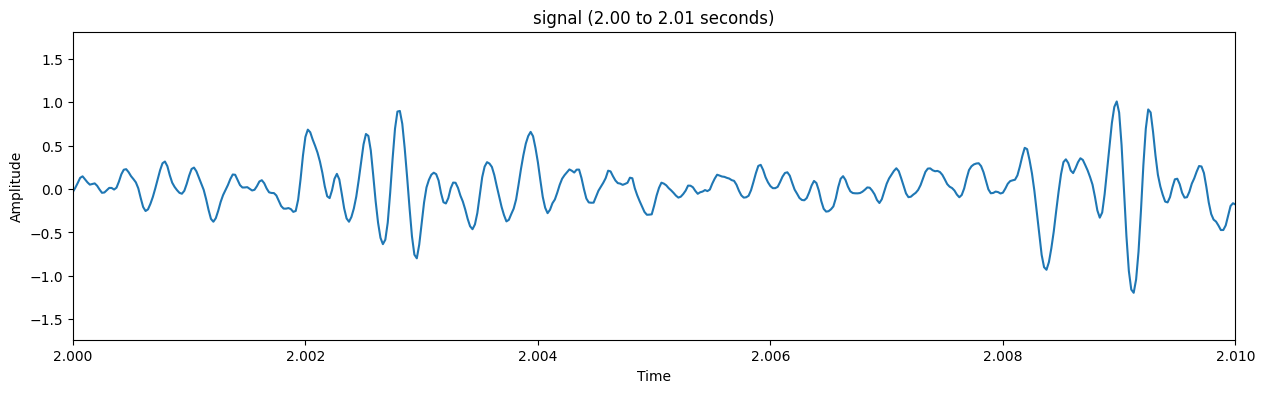

In [9]:
plt.figure(figsize=(15, 4))
plt.plot(time, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('signal (2.00 to 2.01 seconds)')

plt.xlim(2.0, 2.01)

plt.show()

#PART G

#1)

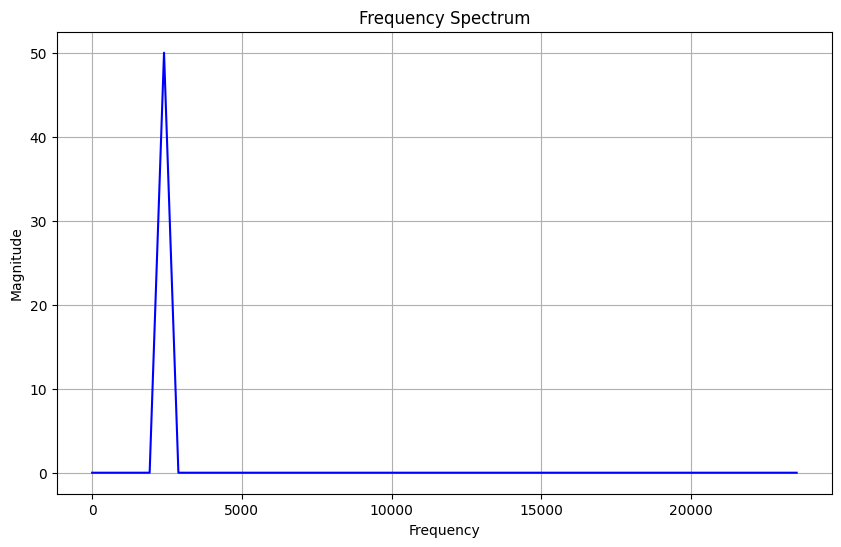

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def plot_frequency_spectrum(signal, sampling_rate):

    # Step 1: Compute the FFT of the signal
    fft_result = np.fft.fft(signal)

    # Step 2: Compute the corresponding frequencies
    n = len(signal)  # Number of samples
    frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

    # Step 3: Compute the magnitude of the FFT result
    magnitude = np.abs(fft_result)

    # Step 4: Only consider the positive frequencies (first half of the spectrum)
    positive_frequencies = frequencies[:n//2]
    positive_magnitude = magnitude[:n//2]

    # Step 5: Plot the frequency spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(positive_frequencies, positive_magnitude, color='blue')
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()


# Define the sampling rate
sampling_rate = fs  # Sampling rate is 48 kHz

# Call the function to plot the frequency spectrum
plot_frequency_spectrum(signal, sampling_rate)